<a href="https://colab.research.google.com/github/k8wi/Dog-Cat-Classification-using-Deep-Neural-Networks/blob/main/Getting_Started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [ ]:
import cv2
import imghdr


In [ ]:
data_dir = 'data3'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)

9595.jpg
9765.jpg
9570.jpg
9986.jpg
9586.jpg
9445.jpg
9778.jpg
9490.jpg
978.jpg
9703.jpg
9583.jpg
9675.jpg
9977.jpg
9653.jpg
948.jpg
9719.jpg
9444.jpg
9669.jpg
9694.jpg
9859.jpg
9929.jpg
9841.jpg
9832.jpg
9807.jpg
9457.jpg
9835.jpg
9589.jpg
9696.jpg
9540.jpg
9531.jpg
976.jpg
9607.jpg
9987.jpg
9779.jpg
949.jpg
9505.jpg
9926.jpg
9718.jpg
9524.jpg
993.jpg
9427.jpg
9833.jpg
9442.jpg
9806.jpg
9769.jpg
9662.jpg
9860.jpg
9942.jpg
9827.jpg
9920.jpg
9683.jpg
9999.jpg
9474.jpg
9556.jpg
9814.jpg
9724.jpg
9790.jpg
9856.jpg
988.jpg
9753.jpg
9811.jpg
9982.jpg
983.jpg
9888.jpg
9854.jpg
9685.jpg
9577.jpg
9434.jpg
9483.jpg
9945.jpg
9665.jpg
9682.jpg
9654.jpg
9919.jpg
9853.jpg
9760.jpg
9886.jpg
9824.jpg
9840.jpg
9732.jpg
99.jpg
9701.jpg
963.jpg
9634.jpg
9481.jpg
9864.jpg
9462.jpg
969.jpg
9955.jpg
9737.jpg
9512.jpg
9877.jpg
9956.jpg
9552.jpg
9792.jpg
9432.jpg
98.jpg
9918.jpg
9795.jpg
9936.jpg
965.jpg
9451.jpg
9879.jpg
9943.jpg
9519.jpg
9449.jpg
9776.jpg
9475.jpg
9468.jpg
9708.jpg
9440.jpg
9904.jpg
9759.j

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Image not in ext list data3/cat/9778.jpg
Image not in ext list data3/cat/9565.jpg
Image not in ext list data3/cat/PetImages - Shortcut.lnk
Image not in ext list data3/cat/Thumbs.db
Image not in ext list data3/dog/1866.jpg
Image not in ext list data3/dog/1308.jpg
Image not in ext list data3/dog/1117.jpg
Image not in ext list data3/dog/2688.jpg


In [ ]:
cv2.imread(os.path.join('data','dog','1000.jpg'))

In [ ]:
img.shape


(217, 174, 3)

In [ ]:
os.listdir(data_dir)


['cat', 'dog']

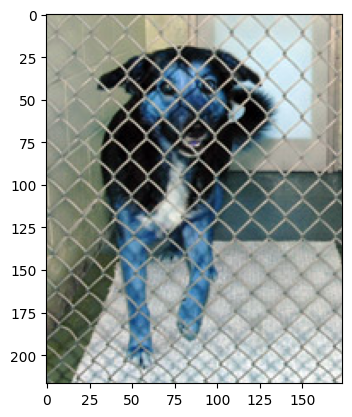

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img)

# 3. Load Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data3')

Found 2914 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

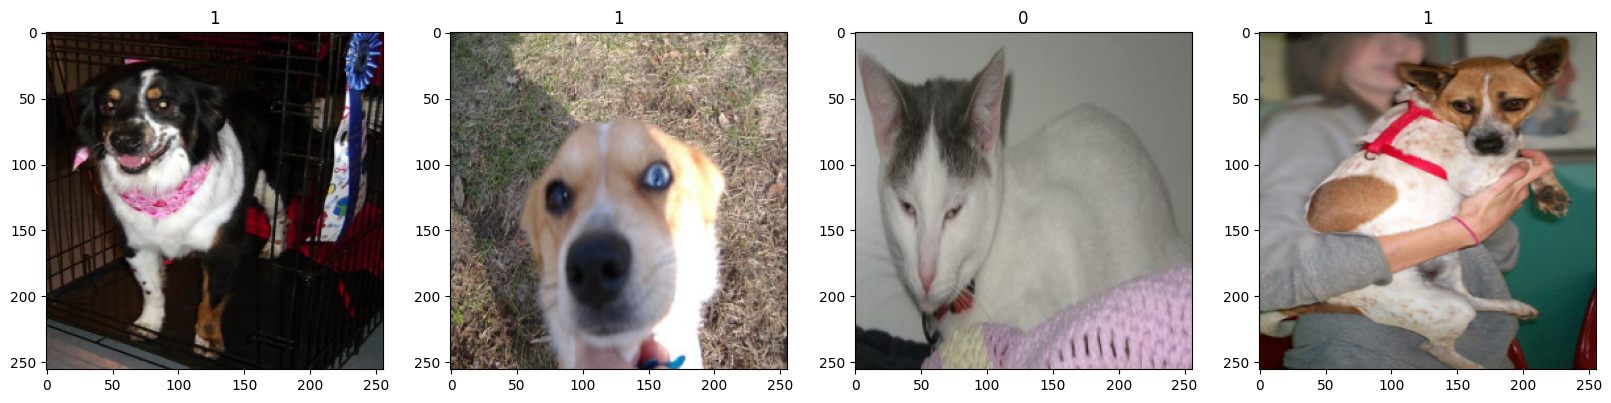

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
batch[0].max()

255.0

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()
batch[0].max()

1.0

In [ ]:
batch

(array([[[[9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01],
          [9.96078432e-01, 9.96078432e-01, 9.96078432e-01]],
 
         [[9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          [9.72549021e-01, 9.45098042e-01, 8.70588243e-01],
          ...,
          [9.92156863e-01, 1.00000000e+00, 9.9607

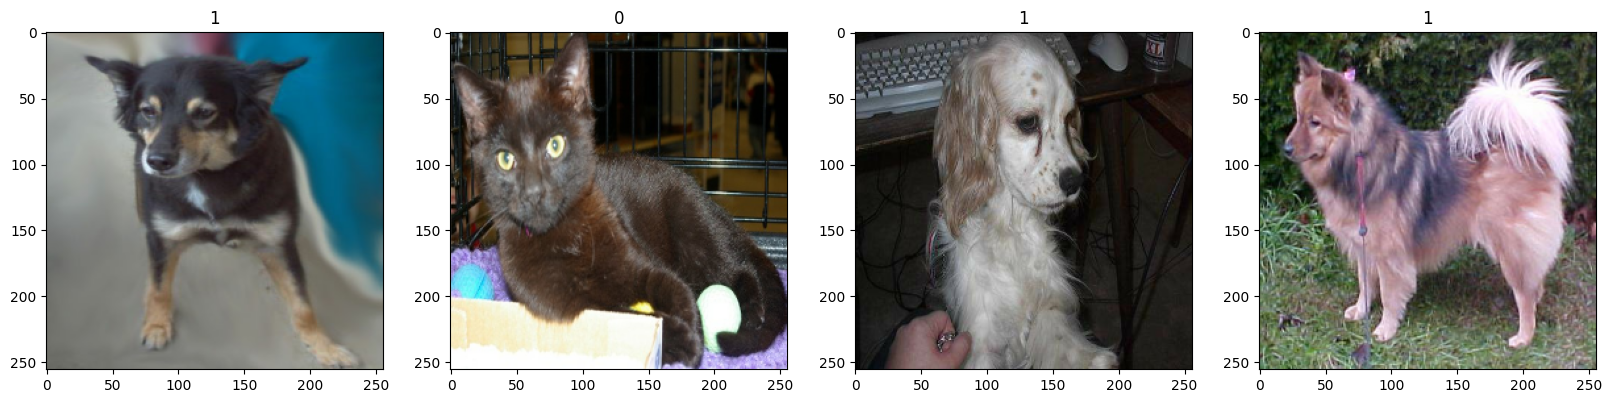

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [ ]:
len(data)

92

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [ ]:
test_size+val_size+train_size

91

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 64)                7

# 7. Train

In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
64/64 [==============================] - 254s 4s/step - loss: 0.6569 - accuracy: 0.7500 - val_loss: 0.5426 - val_accuracy: 0.7865
Epoch 2/30
64/64 [==============================] - 235s 4s/step - loss: 0.4828 - accuracy: 0.7861 - val_loss: 0.6076 - val_accuracy: 0.7865
Epoch 3/30
64/64 [==============================] - 229s 4s/step - loss: 0.4043 - accuracy: 0.8105 - val_loss: 0.4598 - val_accuracy: 0.8021
Epoch 4/30
64/64 [==============================] - 213s 3s/step - loss: 0.2967 - accuracy: 0.8730 - val_loss: 0.4942 - val_accuracy: 0.7674
Epoch 5/30
64/64 [==============================] - 215s 3s/step - loss: 0.1801 - accuracy: 0.9355 - val_loss: 0.5811 - val_accuracy: 0.8142
Epoch 6/30
64/64 [==============================] - 220s 3s/step - loss: 0.1257 - accuracy: 0.9600 - val_loss: 0.5162 - val_accuracy: 0.8264
Epoch 7/30
64/64 [==============================] - 216s 3s/step - loss: 0.0555 - accuracy: 0.9854 - val_loss: 0.5217 - val_accuracy: 0.8299
Epoch 8/30
64

# 8. Plot Performance

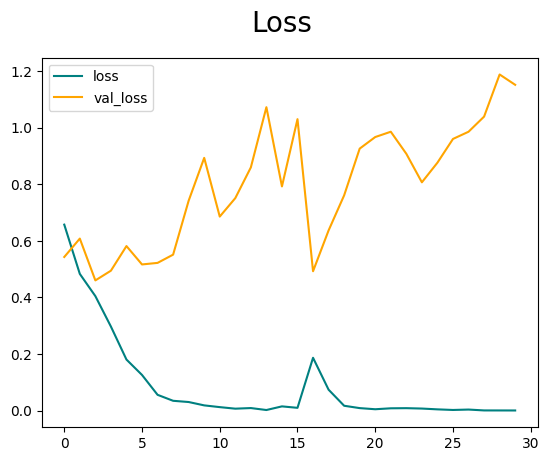

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

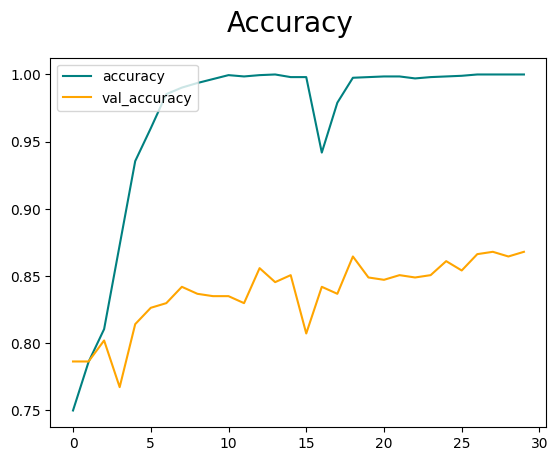

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 695ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.8467742, shape=(), dtype=float32) tf.Tensor(0.92105263, shape=(), dtype=float32) tf.Tensor(0.8055556, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

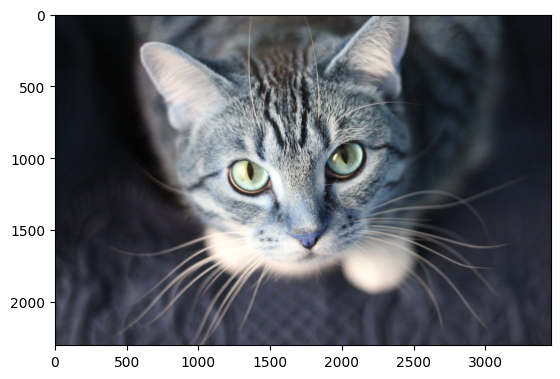

In [ ]:
img = cv2.imread('cat.jpg')
plt.imshow(img)
plt.show()

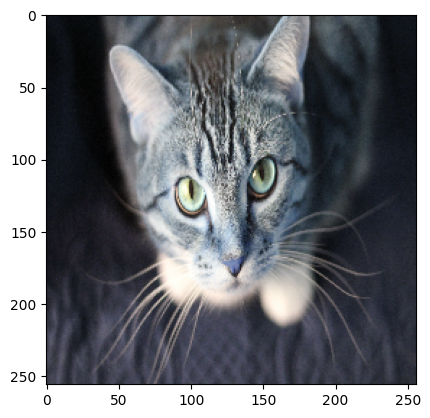

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 71ms/step


In [ ]:
yhat

array([[0.00220183]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is dog')
else:
    print(f'Predicted class is cat')

Predicted class is cat


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','Dog-cat.h5'))

In [ ]:
new_model = load_model(os.path.join('models','Dog-cat.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 144ms/step


array([[0.00220183]], dtype=float32)